In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df = pd.read_csv('bank.csv')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [9]:
df.shape

(11162, 17)

In [10]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


In [11]:
for col in df.select_dtypes(include='object').columns:
    print(col)
    print(df[col].unique())

job
['admin.' 'technician' 'services' 'management' 'retired' 'blue-collar'
 'unemployed' 'entrepreneur' 'housemaid' 'unknown' 'self-employed'
 'student']
marital
['married' 'single' 'divorced']
education
['secondary' 'tertiary' 'primary' 'unknown']
default
['no' 'yes']
housing
['yes' 'no']
loan
['no' 'yes']
contact
['unknown' 'cellular' 'telephone']
month
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
poutcome
['unknown' 'other' 'failure' 'success']
deposit
['yes' 'no']


In [12]:
print(df['job'].unique())
print(df['marital'].unique())
print(df['education'].unique())
print(df['contact'].unique())
print(df['poutcome'].unique())

['admin.' 'technician' 'services' 'management' 'retired' 'blue-collar'
 'unemployed' 'entrepreneur' 'housemaid' 'unknown' 'self-employed'
 'student']
['married' 'single' 'divorced']
['secondary' 'tertiary' 'primary' 'unknown']
['unknown' 'cellular' 'telephone']
['unknown' 'other' 'failure' 'success']


In [13]:
##check missing values
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [14]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


In [15]:
final_dataset=df[['age','balance','duration','campaign','job','marital','education','contact','poutcome','deposit']]
final_dataset.head()

,age,balance,duration,campaign,job,marital,education,contact,poutcome,deposit
0,59,2343,1042,1,admin.,married,secondary,unknown,unknown,yes
1,56,45,1467,1,admin.,married,secondary,unknown,unknown,yes
2,41,1270,1389,1,technician,married,secondary,unknown,unknown,yes
3,55,2476,579,1,services,married,secondary,unknown,unknown,yes
4,54,184,673,2,admin.,married,tertiary,unknown,unknown,yes


In [16]:
df.replace(to_replace ="admin.",
                 value ="admin")

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no


In [17]:
final_dataset=pd.get_dummies(final_dataset,drop_first=True)
final_dataset.head()

,age,balance,duration,campaign,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,...,marital_single,education_secondary,education_tertiary,education_unknown,contact_telephone,contact_unknown,poutcome_other,poutcome_success,poutcome_unknown,deposit_yes
0,59,2343,1042,1,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,1,1
1,56,45,1467,1,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,1,1
2,41,1270,1389,1,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,1,1
3,55,2476,579,1,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,1,1
4,54,184,673,2,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,1,1


In [18]:
final_dataset.columns

Index(['age', 'balance', 'duration', 'campaign', 'job_blue-collar',
       'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student', 'job_technician',
       'job_unemployed', 'job_unknown', 'marital_married', 'marital_single',
       'education_secondary', 'education_tertiary', 'education_unknown',
       'contact_telephone', 'contact_unknown', 'poutcome_other',
       'poutcome_success', 'poutcome_unknown', 'deposit_yes'],
      dtype='object')

In [19]:
final_dataset.corr()

,age,balance,duration,campaign,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,...,marital_single,education_secondary,education_tertiary,education_unknown,contact_telephone,contact_unknown,poutcome_other,poutcome_success,poutcome_unknown,deposit_yes
age,1.000000,0.112300,0.000189,-0.005278,-0.066567,0.024176,0.082739,-0.046492,0.555863,-0.023163,...,-0.467799,-0.094400,-0.101372,0.077761,0.210912,-0.037860,-0.018715,0.062114,-0.027021,0.034901
balance,0.112300,1.000000,0.022436,-0.013894,-0.046220,0.005039,-0.007987,0.044912,0.075423,0.020264,...,-0.014994,-0.070609,0.069128,0.014596,0.060350,-0.046237,0.028521,0.045603,-0.046091,0.081129
duration,0.000189,0.022436,1.000000,-0.041557,0.029986,-0.000908,-0.010807,-0.016546,0.014194,0.013506,...,0.023847,0.003820,-0.006813,-0.015887,-0.015966,-0.013107,-0.008782,-0.022578,0.044006,0.451919
campaign,-0.005278,-0.013894,-0.041557,1.000000,0.005522,0.013883,0.010570,0.015988,-0.037943,0.001776,...,-0.046165,-0.013834,-0.005427,0.012976,0.046576,0.045016,-0.023689,-0.091807,0.131392,-0.128081
job_blue-collar,-0.066567,-0.046220,0.029986,0.005522,1.000000,-0.079905,-0.072850,-0.250905,-0.125701,-0.089107,...,-0.077645,0.076687,-0.298548,-0.000640,-0.018414,0.162004,-0.002788,-0.077422,0.066703,-0.100840
job_entrepreneur,0.024176,0.005039,-0.000908,0.013883,-0.079905,1.000000,-0.027602,-0.095065,-0.047627,-0.033762,...,-0.058665,-0.021132,0.026612,-0.001555,0.006799,0.018308,-0.024244,-0.035072,0.036967,-0.034443
job_housemaid,0.082739,-0.007987,-0.010807,0.010570,-0.072850,-0.027602,1.000000,-0.086673,-0.043422,-0.030781,...,-0.060264,-0.065345,-0.058532,-0.008983,0.027349,0.000585,-0.011314,-0.008434,0.023429,-0.024155
job_management,-0.046492,0.044912,-0.016546,0.015988,-0.250905,-0.095065,-0.086673,1.000000,-0.149550,-0.106014,...,0.018908,-0.434808,0.602002,-0.031231,-0.042690,-0.086916,0.017462,0.033104,-0.036213,0.036301
job_retired,0.555863,0.075423,0.014194,-0.037943,-0.125701,-0.047627,-0.043422,-0.149550,1.000000,-0.053112,...,-0.166003,-0.047633,-0.087604,0.021081,0.160725,-0.063484,-0.002350,0.072092,-0.037441,0.103827
job_self-employed,-0.023163,0.020264,0.013506,0.001776,-0.089107,-0.033762,-0.030781,-0.106014,-0.053112,1.000000,...,0.016864,-0.060080,0.097929,-0.016336,0.003614,0.003384,0.005632,-0.001399,0.005394,-0.004707


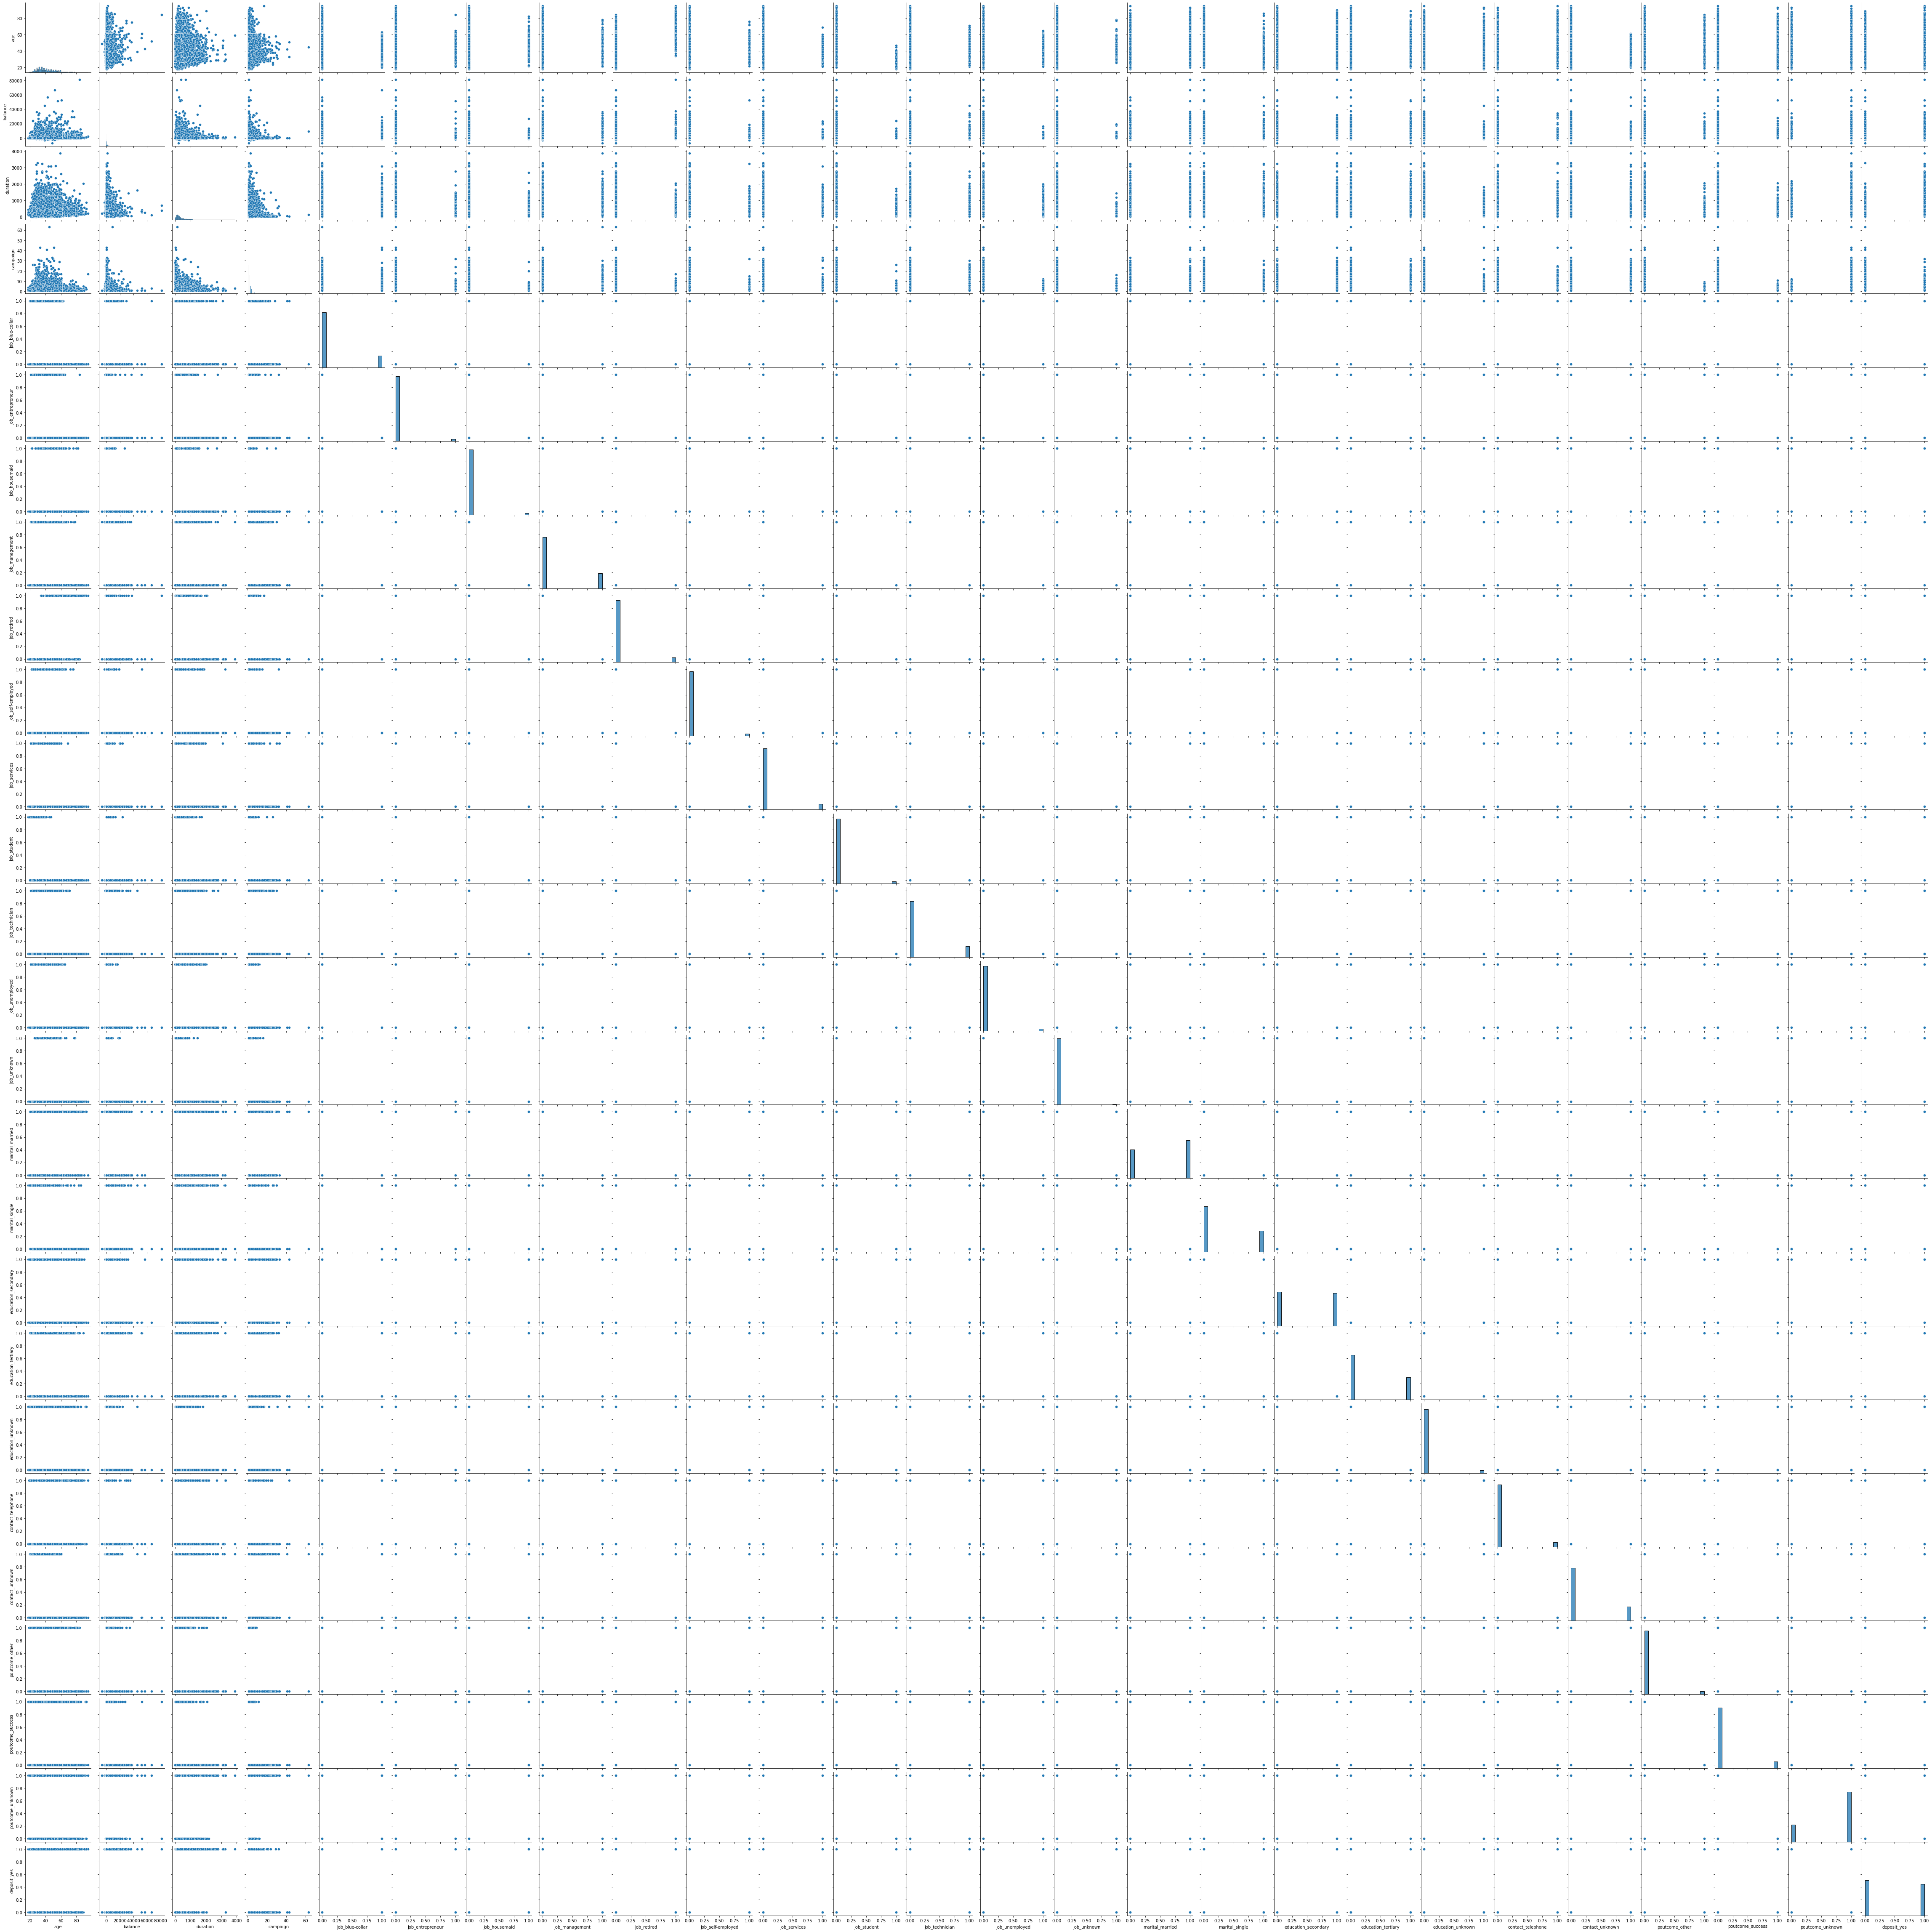

In [20]:
sns.pairplot(final_dataset)

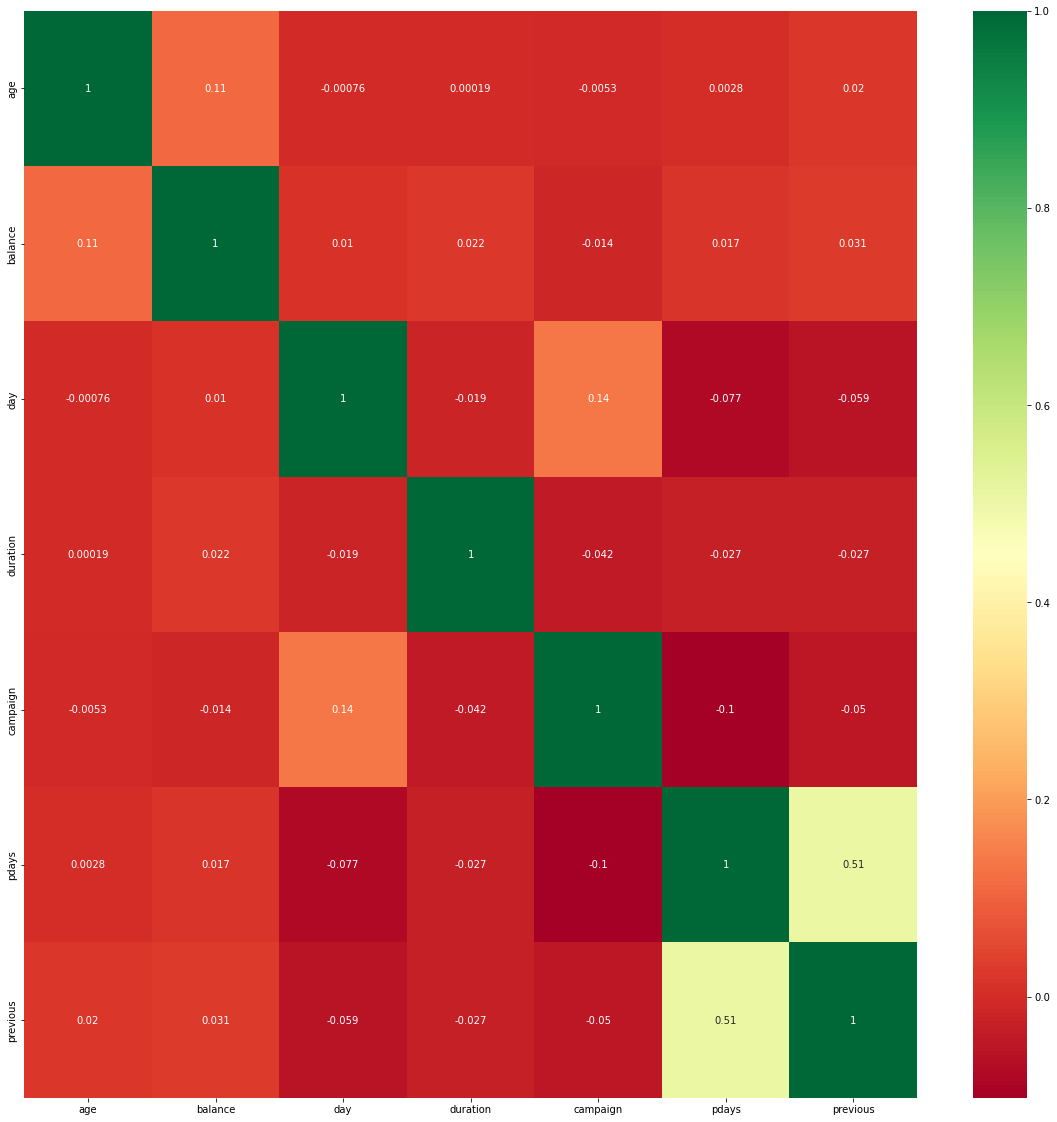

In [21]:
#get correlations of each features in dataset
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [22]:
X=final_dataset.iloc[:,0:-2]
y=final_dataset.iloc[:,-1]
X.columns

Index(['age', 'balance', 'duration', 'campaign', 'job_blue-collar',
       'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student', 'job_technician',
       'job_unemployed', 'job_unknown', 'marital_married', 'marital_single',
       'education_secondary', 'education_tertiary', 'education_unknown',
       'contact_telephone', 'contact_unknown', 'poutcome_other',
       'poutcome_success'],
      dtype='object')

In [23]:
X['campaign'].unique()

array([ 1,  2,  3,  4,  6,  5,  8, 11,  9, 10, 15, 12, 14,  7, 24, 13, 17,
       29, 21, 20, 16, 32, 19, 25, 22, 43, 18, 41, 63, 27, 30, 26, 23, 28,
       33, 31], dtype=int64)

In [24]:
X.head()

,age,balance,duration,campaign,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,...,job_unknown,marital_married,marital_single,education_secondary,education_tertiary,education_unknown,contact_telephone,contact_unknown,poutcome_other,poutcome_success
0,59,2343,1042,1,0,0,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0
1,56,45,1467,1,0,0,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0
2,41,1270,1389,1,0,0,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0
3,55,2476,579,1,0,0,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0
4,54,184,673,2,0,0,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0


In [25]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: deposit_yes, dtype: uint8

In [26]:
### Feature Importance

from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt
model = ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

In [27]:
print(model.feature_importances_)

[0.11605437 0.11548343 0.39229562 0.06279949 0.01371229 0.00671472
 0.00550803 0.0134942  0.00729541 0.00686522 0.00957022 0.00787657
 0.01484651 0.00653636 0.00179687 0.01532677 0.01262887 0.01553833
 0.01265834 0.0076345  0.01191959 0.0475183  0.01259644 0.08332956]


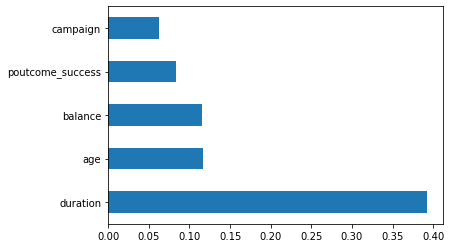

In [28]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [30]:
from sklearn.ensemble import RandomForestRegressor

In [31]:
regressor=RandomForestRegressor()

In [32]:
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
print(n_estimators)

[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200]


In [33]:
from sklearn.model_selection import RandomizedSearchCV

In [34]:
 #Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [35]:
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [36]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()

In [37]:
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)


In [38]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.9s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   3.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.9s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.8s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   3.1s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   4.5s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   4.8s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [39]:
rf_random.best_params_

{'n_estimators': 300,
 'min_samples_split': 100,
 'min_samples_leaf': 5,
 'max_features': 'auto',
 'max_depth': 15}

In [40]:
rf_random.best_score_

-0.13477728980584228

In [41]:
predictions=rf_random.predict(X_test)

C:\Users\703311085\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='deposit_yes', ylabel='Density'>

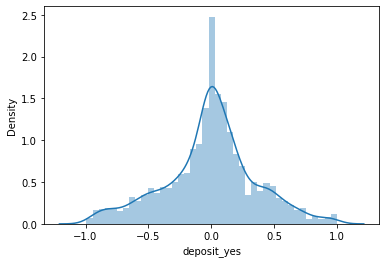

In [42]:
sns.distplot(y_test-predictions)

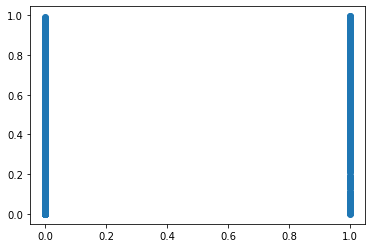

In [43]:
plt.scatter(y_test,predictions)

In [44]:
from sklearn import metrics

In [45]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.26807890929231787
MSE: 0.13258105254334465
RMSE: 0.36411681167359555


In [76]:
import pickle
# open a file, where you ant to store the data
file = open('ml-model.pkl', 'wb')

# dump information to that file
pickle.dump(rf_random, file)